In [4]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
# seaborn does not appear to use this inline command
#%seaborn inline

In [5]:
# Read data from the file and store in the variable `data`
data = pd.read_csv('Assign_data.csv', dtype={'Year': int, '113 Cause Name': str, 'Cause Name': 'category', 'State': 'category', 'Deaths': float, 'Age-adjusted Death Rate': float})
data.index.name = 'Index'
data.columns = map(str.capitalize, data.columns)
# Print the first 10 rows of the data
# print('First 10 rows of data:')
data.head(10)


,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7
5,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Colorado,1519.0,39.0
6,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Connecticut,1034.0,29.3
7,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Delaware,267.0,35.3
8,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,District of Columbia,161.0,28.4


In [6]:
# Print the last 5 rows of the data
# print('\nLast 5 rows of data:')
data.tail(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
15023,2015,Septicemia (A40-A41),Septicemia,Virginia,1187.0,13.0
15024,2015,Septicemia (A40-A41),Septicemia,Washington,501.0,6.3
15025,2015,Septicemia (A40-A41),Septicemia,West Virginia,348.0,13.9
15026,2015,Septicemia (A40-A41),Septicemia,Wisconsin,517.0,7.2
15027,2015,Septicemia (A40-A41),Septicemia,Wyoming,46.0,7.1


In [7]:
# Print summary information on the data table columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15028 entries, 0 to 15027
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     15028 non-null  int64   
 1   113 cause name           15028 non-null  object  
 2   Cause name               15028 non-null  category
 3   State                    15028 non-null  category
 4   Deaths                   15013 non-null  float64 
 5   Age-adjusted death rate  14917 non-null  float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 500.2+ KB


In [8]:
# Print the number of empty values in each column
print("Number of empty values:")
print(data.isna().sum())

# Print the number of null values in each column
print("\nNumber of null values:")
print(data.isnull().sum())

Number of empty values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64

Number of null values:
Year                         0
113 cause name               0
Cause name                   0
State                        0
Deaths                      15
Age-adjusted death rate    111
dtype: int64


In [9]:
# Print descriptive statistics for the data
print(data.describe())

               Year        Deaths  Age-adjusted death rate
count  15028.000000  1.501300e+04             14917.000000
mean    2007.000000  1.023261e+04                86.526393
std        4.899142  9.003261e+04               190.764950
min     1999.000000  1.000000e+01                 1.300000
25%     2003.000000  2.940000e+02                 8.300000
50%     2007.000000  8.380000e+02                18.900000
75%     2011.000000  2.737000e+03                46.300000
max     2015.000000  2.712630e+06              1087.300000


<AxesSubplot:title={'center':'Total Deaths by State'}, xlabel='State'>

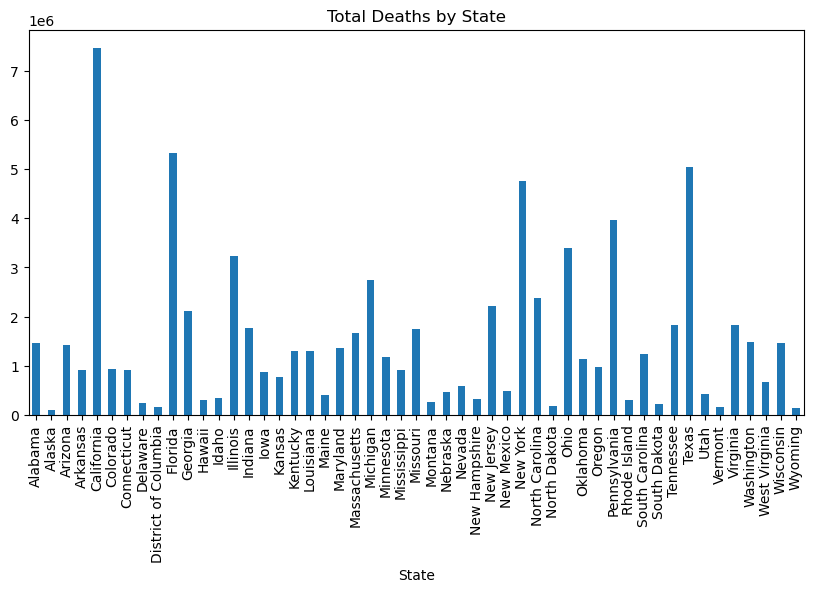

In [10]:
# Are there differences in percentages of the causes by state?

state_death_data = data.groupby('State')['Deaths'].sum()

# drop the 'United States' row
state_death_data = state_death_data.drop('United States')

state_death_data.plot(kind='bar', figsize=(10, 5), title='Total Deaths by State')


In [11]:
us = data.loc[data['State'] == 'United States']
us.head(5)

,Year,113 cause name,Cause name,State,Deaths,Age-adjusted death rate
Index,,,,,,
45,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97860.0,35.3
98,2000,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,97900.0,34.9
151,2001,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,101537.0,35.7
204,2002,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,106742.0,37.1
256,2003,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,109277.0,37.6


<AxesSubplot:title={'center':'Deaths by Year in the United States'}, xlabel='Year'>

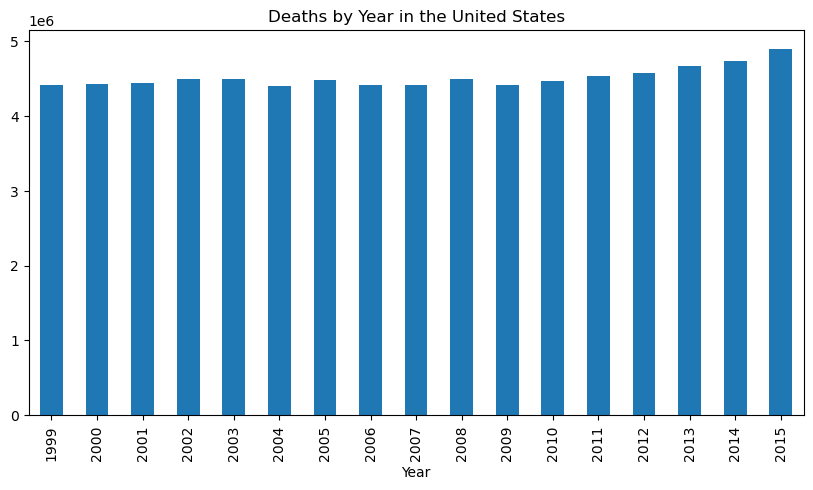

In [12]:
# total deaths by year
us_by_year = us.groupby('Year')['Deaths'].sum()
us_by_year.plot(kind='bar', figsize=(10, 5), title='Deaths by Year in the United States')

<AxesSubplot:title={'center':'Total Deaths by Cause for the US'}, xlabel='Year'>

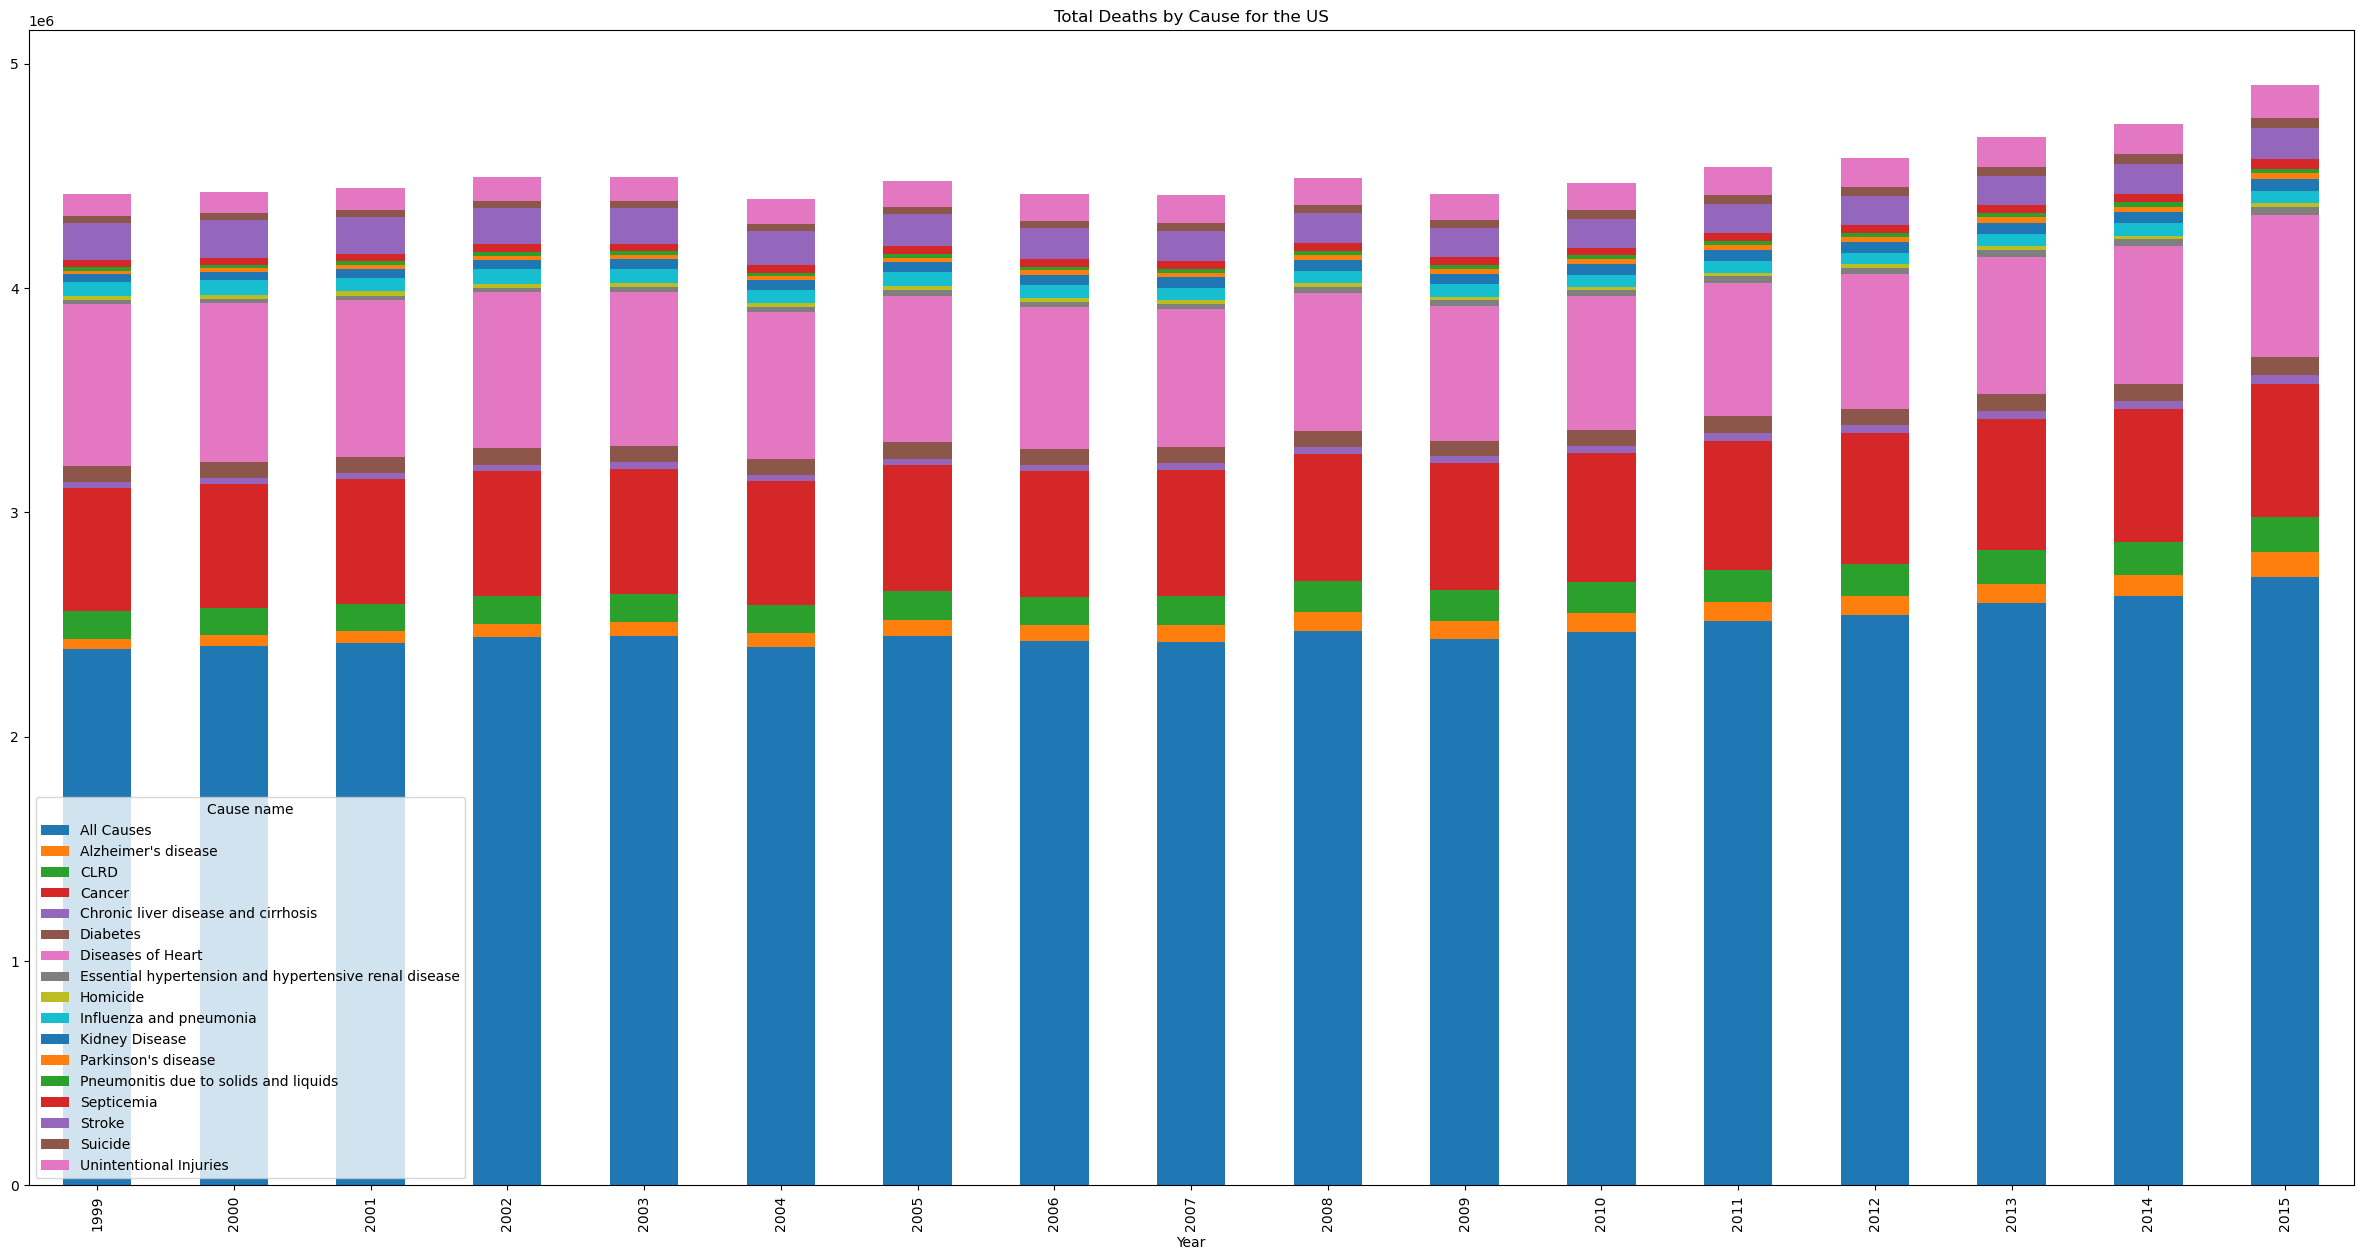

In [13]:
# create a stacked bar chart for the whole us, each bar is a year and each stack is a cause
us.groupby(['Year', 'Cause name'])['Deaths'].sum().unstack().plot(kind='bar', stacked=True, figsize=(30, 15), title='Total Deaths by Cause for the US')

<AxesSubplot:title={'center':'Total Deaths by Cause'}, xlabel='Cause name'>

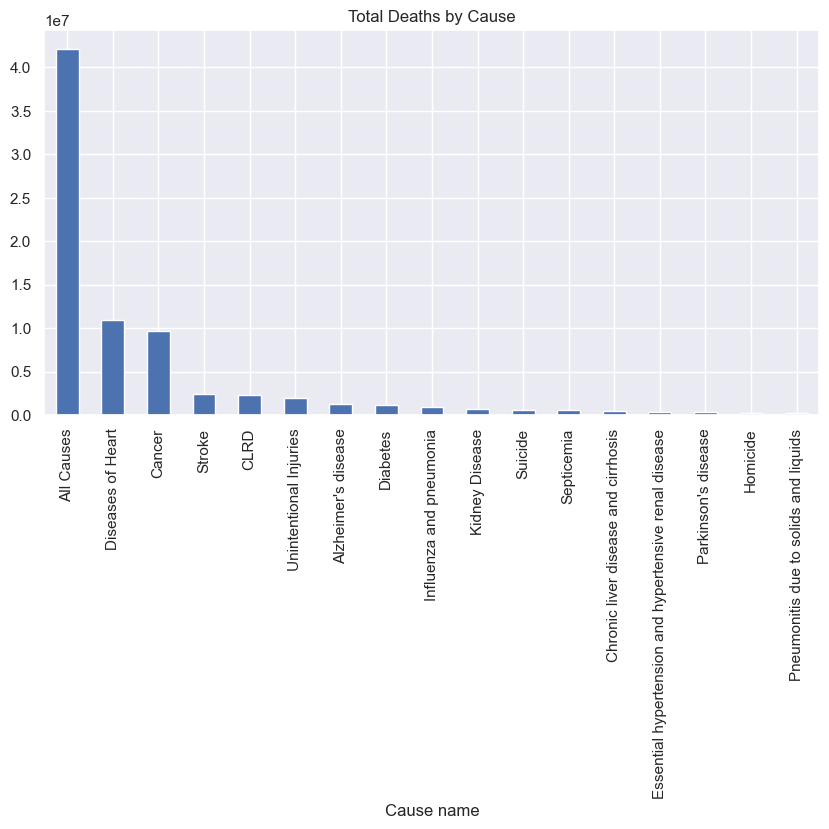

In [22]:
# total deaths by cause across all years
us.groupby('Cause name')['Deaths'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Total Deaths by Cause')

# us.Deaths.value_counts(normalize=False).plot.bar() 


<AxesSubplot:title={'center':'Deaths by Cause in the United States'}, xlabel='Cause name'>

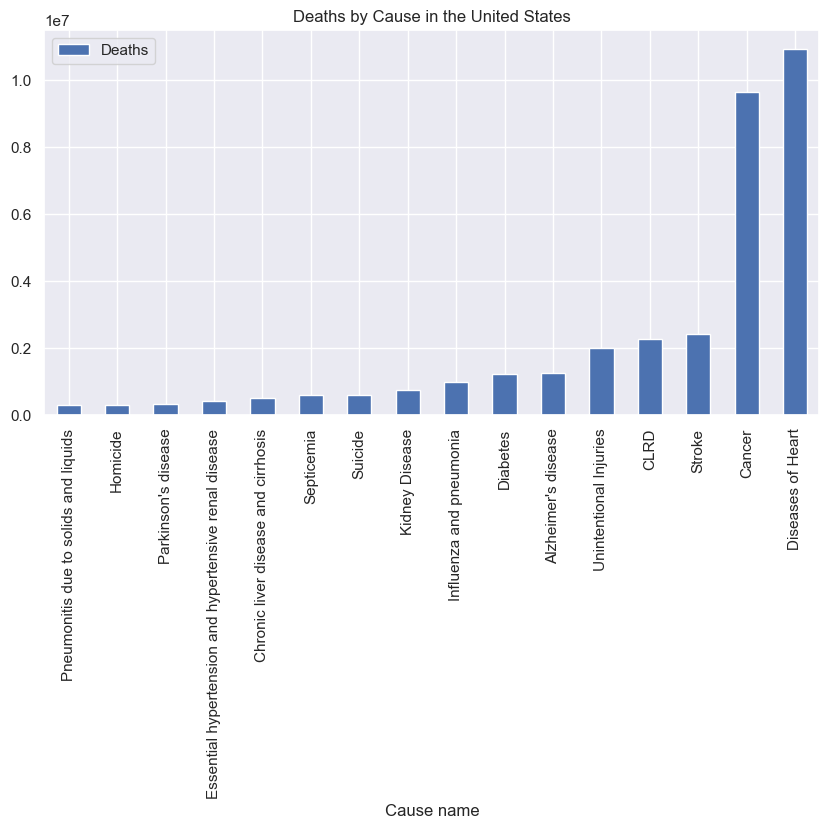

In [69]:
# Because the above chart includes "All Causes", it could be more useful and clear
# Removing "All Causes" will show the relative scale better
us_by_cause = us.groupby('Cause name')['Deaths'].sum().sort_values().to_frame()
us_without_all = us_by_cause.drop('All Causes')
us_without_all.plot(kind='bar', figsize=(10, 5), title='Deaths by Cause in the United States')

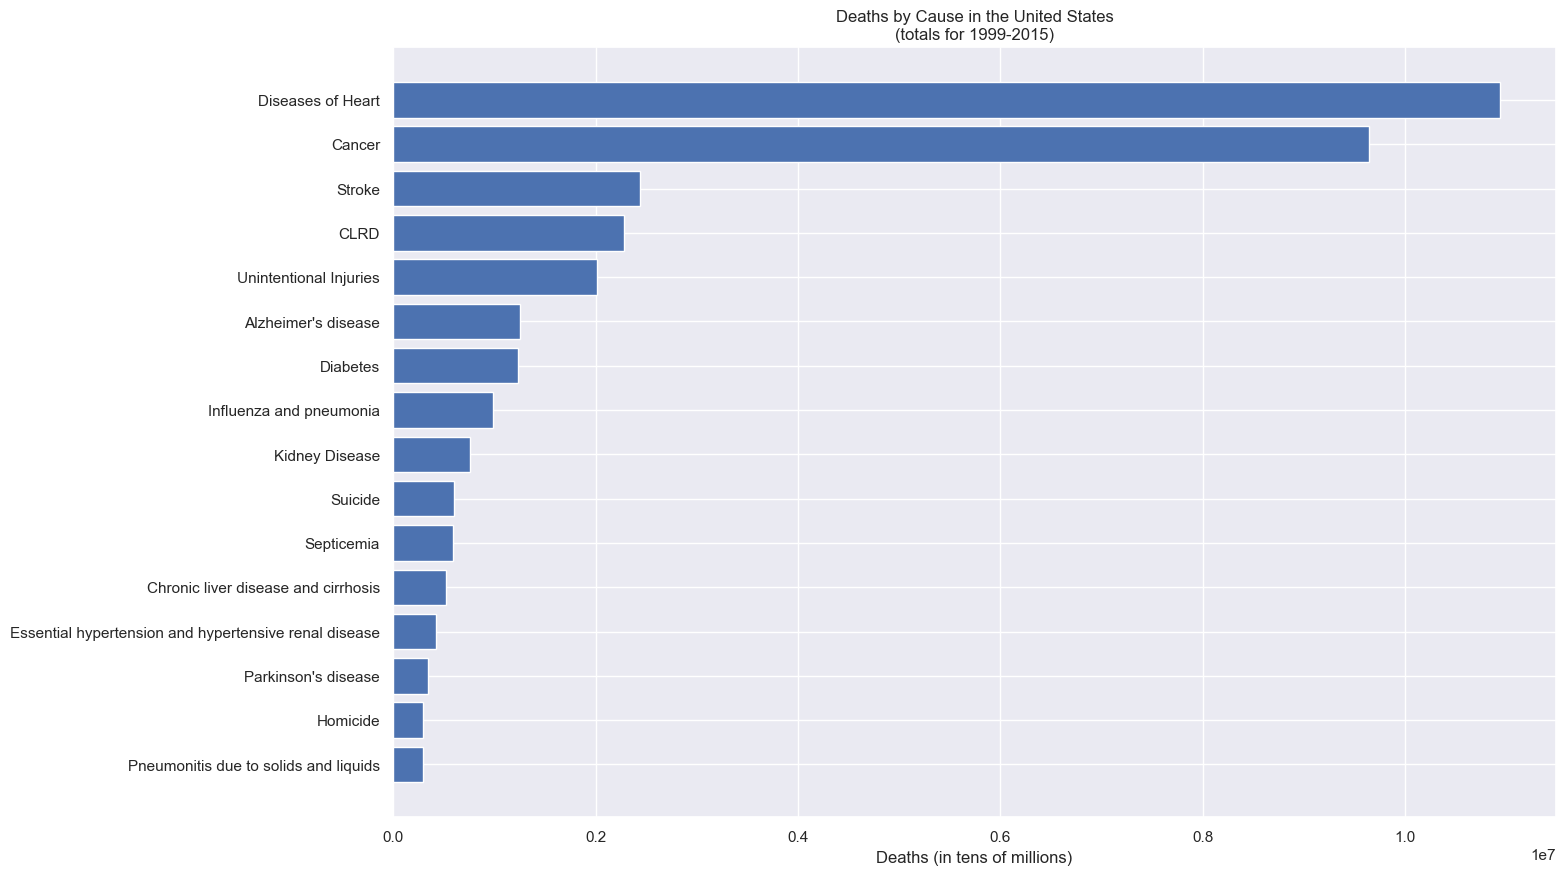

In [72]:
# rotate the above chart to make the labels easiers to read
# barh = horizontal bar chart
fig, ax = plt.subplots()
ax.barh(us_without_all.index, us_without_all['Deaths'])
ax.set_title('Deaths by Cause in the United States\n(totals for 1999-2015)')
ax.set_xlabel("Deaths (in tens of millions)")
plt.show()

In [64]:
# Do the percentages of the causes change over time?
df = us[us['Cause name'].isin(['All Causes']) == False]

# Matt:
# create a table of the the top causes of death by year
# create a table of the top 5 percentage increases/decreases in causes of death by year for the US
# graph first derivative of deaths by cause by year for the US

# Lucas:
# create a table of the top 5 causes of death by year for each state
# create a table of the top 5 percentage increases/decreases in causes of death by year for each state
# graph first derivative of deaths by cause by year for each state

# box plot for each cause by year with percentages of the deaths in that state

# show table with 0 values for the Age-adjusted Death Rate for each cause 
# to show that it is because of the low number of deaths for that cause/state/year


In [65]:
# create a table of causes of death by year for each state
#TODO: improve readability when using year
data_without = data.loc[data['Cause name'] != 'All Causes'] # Remove all causes
data_without = data_without.loc[data['State'] != 'United States'] #Remove United States
#us_by_state_cause = data_without.groupby(['State','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = data_without.groupby(['State','Year','Cause name']).agg({'Deaths': 'sum'}) #Group and sum
us_by_state_cause = us_by_state_cause.groupby(level=0).apply(lambda x:100 * x/ float(x.sum())) #Percentage
#us_by_state_cause = us_by_state_cause.sort_values(['State','Deaths'], ascending=False)
us_by_state_cause = us_by_state_cause.sort_values(['Year','State','Deaths'], ascending=False)
print(us_by_state_cause)

                                                                   Deaths
State   Year Cause name                                                  
Wyoming 2015 Diseases of Heart                                   1.731820
             Cancer                                              1.565364
             Unintentional Injuries                              0.672551
             CLRD                                                0.618747
             Stroke                                              0.332913
...                                                                   ...
Alabama 1999 Chronic liver disease and cirrhosis                 0.062418
             Essential hypertension and hypertensive renal d...  0.047420
             Pneumonitis due to solids and liquids               0.046359
             Parkinson's disease                                 0.031361
             All Causes                                          0.000000

[15028 rows x 1 columns]


Text(0.5, 1.0, 'Deaths by Cause by Year in the United States')

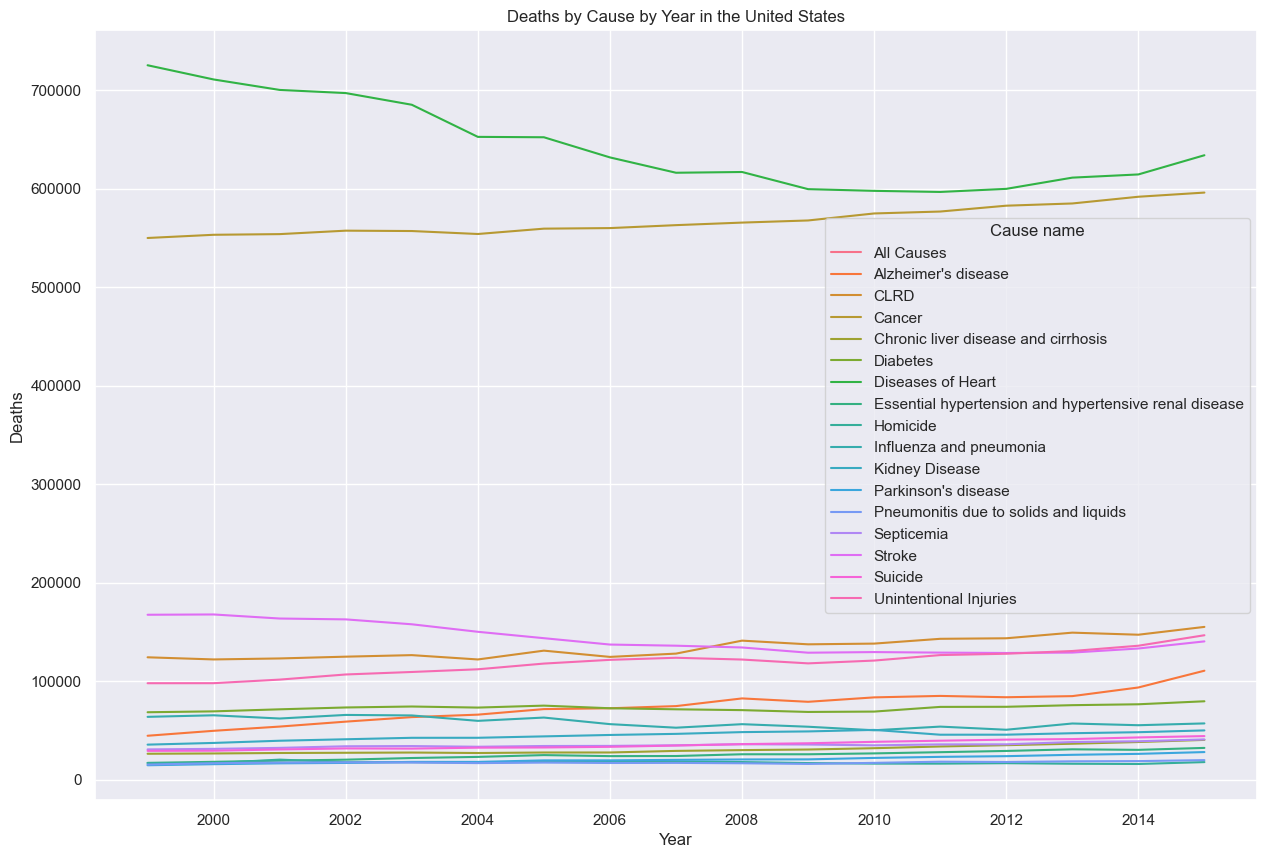

In [66]:


# make this bigger 
sns.set(rc={"figure.figsize":(15, 10)}) 
sns.lineplot(data=df, x='Year', y='Deaths', hue='Cause name').set_title('Deaths by Cause by Year in the United States')




In [67]:
# Do the percentages of the causes change over time by state?


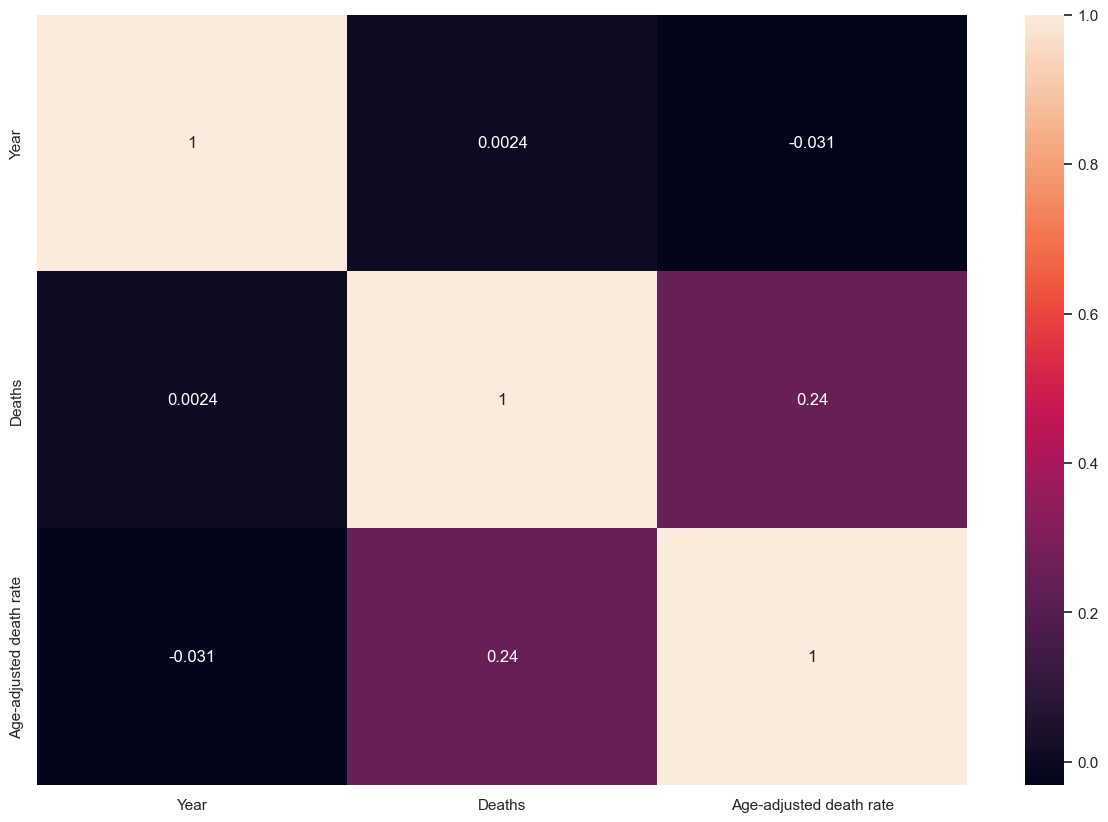

<Figure size 500x500 with 0 Axes>

In [68]:
#Corralation matrix
sns.heatmap(data=data.corr(),annot=True) #heatmap based on the corralation of variables
plt.figure(figsize=(5,5)) #Create a figure with the size of 5x5 inches
plt.show()